In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import data
import model
from model.equivariant import all_rotoflips
from skimage.transform import resize
from skimage.exposure import equalize_hist
import os

## Data visualization

In [2]:
torch.tensor(np.moveaxis(data.premade.preview[0][0], -1, 0)).unsqueeze(0).shape

torch.Size([1, 3, 96, 96])

all 8 rotoflips of example image


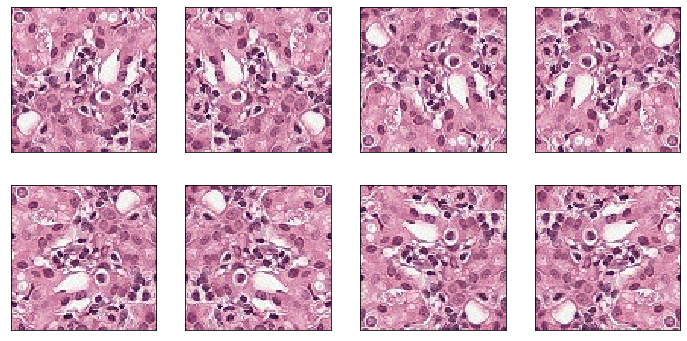

In [3]:
print('all 8 rotoflips of example image')
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
example_tensor = torch.tensor(np.moveaxis(data.premade.preview[0][0], -1, 0)).unsqueeze(0)
rotoflips = all_rotoflips(example_tensor)
for ax, rotoflip in zip([ax for ax_row in axes for ax in ax_row], rotoflips):
    ax.imshow(np.moveaxis(rotoflip.squeeze().numpy(), 0, -1))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

220025 pictures in train set
57458 pictures in test set
Images shape: (96, 96, 3)


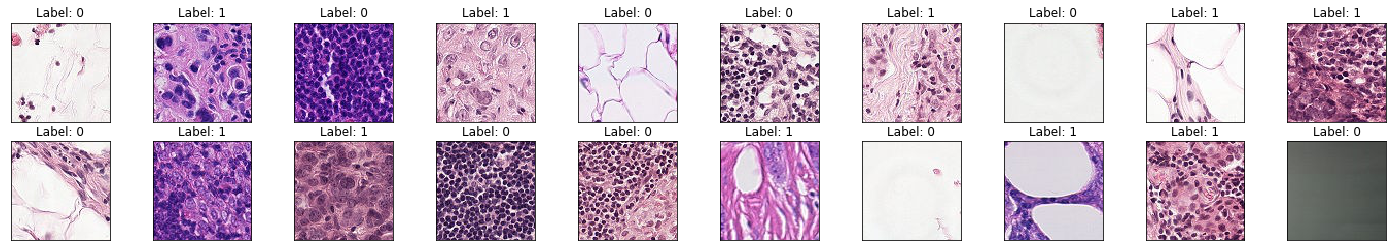

In [4]:
# Get plots for visualization

train_dir = 'data/train'
test_dir = 'data/test'
csv_dir = 'data/train_labels.csv'

labels = pd.read_csv(csv_dir)

print(f'{len(os.listdir(train_dir))} pictures in train set')
print(f'{len(os.listdir(test_dir))} pictures in test set')

rows = 2; columns = 10;
fig, axs = plt.subplots(rows,columns,figsize=(25,4))
axs = axs.ravel()

train_imgs = os.listdir(train_dir)
n_images = rows * columns

for idx, file_name in enumerate(np.random.choice(train_imgs, n_images)):
    img = plt.imread(os.path.join(train_dir,file_name))
    if idx == 0: print(f'Images shape: {img.shape}')
    axs[idx].imshow(img)
    lab = labels.loc[labels['id'] == file_name.split('.')[0], 'label'].values[0]
    axs[idx].set_title(f'Label: {lab}')
    axs[idx].get_xaxis().set_visible(False)
    axs[idx].get_yaxis().set_visible(False)

## Network processing visualization

In [6]:
standard_model = model.Standard(load_from='./model/standard.pth')
equivariant_model = model.Equivariant(load_from='./model/equivariant.pth')

In [84]:
def plot_attention(model):
    so_far = example_tensor
    red = example_tensor[0, 0].detach().numpy()
    blue = example_tensor[0, 2].detach().numpy()
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 16))
    ax_id = 0
    for layer in model.convolutional:
        so_far = layer(so_far)
        
        if layer.__class__ is torch.nn.ReLU:
            attention = (so_far[0] ** 2).mean(dim=0).detach().numpy()
            attention = resize(attention, red.shape)
            attention = equalize_hist(attention)
            plottable = np.moveaxis(np.stack((red, attention, blue)), 0, -1)
        
            axes[ax_id].set_xticks([])
            axes[ax_id].set_yticks([])
            axes[ax_id].imshow(plottable)
            ax_id += 1
            
    plt.show()

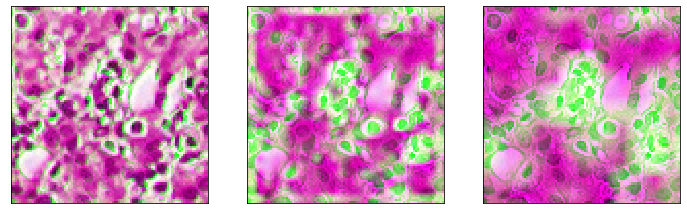

In [85]:
plot_attention(standard_model)

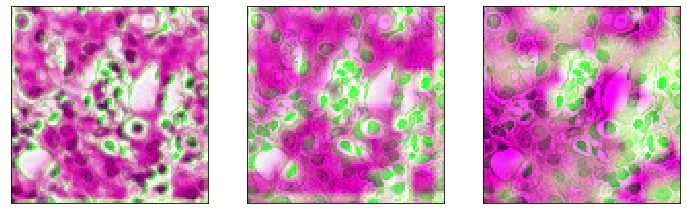

In [86]:
plot_attention(equivariant_model)